In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-dataset-variable-desc/House Price Dataset.xlsx
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


https://www.kaggle.com/code/prabhavjain001/house-price-eda-prabhav/edit/run/180595156

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
#this allows to show plot in output cell without the use of plt.show()

In [3]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have sh

In [5]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data)
# profile.to_file('HousePriceProfileReport.html')

In [6]:
data.shape

(1460, 81)

In [7]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#Add the variables study excel sheet here
var_study = pd.read_excel('/kaggle/input/house-dataset-variable-desc/House Price Dataset.xlsx')
var_study

,Variable,Type,Segment,Expectation,Conclusion,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN
1,MSSubClass,Categorical,Building,High,NaN,NaN
2,MSZoning,Categorical,Building,Medium,NaN,Every sub group will have there own price segm...
3,LotFrontage,Numerical,Building,Low,NaN,NaN
4,LotArea,Numerical,Space,High,NaN,NaN
...,...,...,...,...,...,...
77,YrSold:,Numerical,Building,Low,NaN,NaN
78,SaleType:,Categorical,Building,Low,NaN,NaN
79,SaleCondition:,Categorical,Building,Low,NaN,NaN
80,Id,NaN,NaN,NaN,NaN,NaN


In [10]:
data['MSSubClass'].nunique()

15

In [11]:
data['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

In [12]:
data['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

***Analysing SalePrice***

In [13]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
data['SalePrice'].isnull().sum()

0

In [15]:
data['SalePrice'].nunique()

663

In [16]:
data['SalePrice'].duplicated().sum()

797

In [17]:
mod = data['SalePrice'].mode()
print(mod)

0    140000
Name: SalePrice, dtype: int64


In [18]:
data['SalePrice'].value_counts()[mod]

SalePrice
140000    20
Name: count, dtype: int64

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

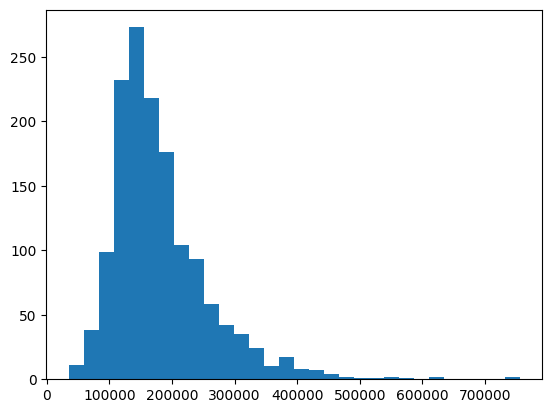

In [19]:
plt.hist(data['SalePrice'], bins=30)

<Axes: xlabel='SalePrice'>

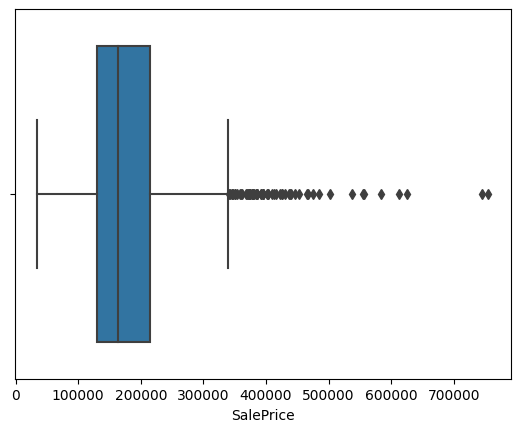

In [20]:
sns.boxplot(x='SalePrice', data=data)

<Axes: xlabel='SalePrice', ylabel='Density'>

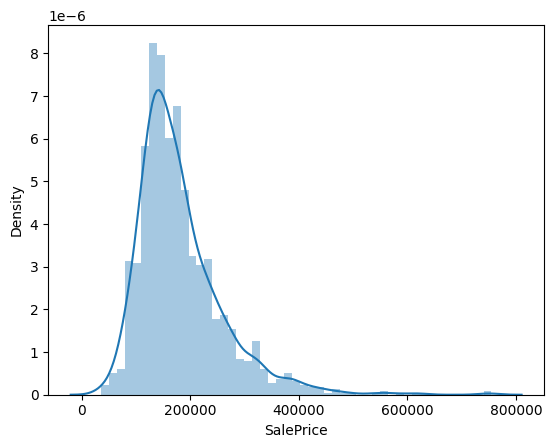

In [21]:
sns.distplot(data['SalePrice'])

In [22]:
print(data['SalePrice'].skew())
print(data['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


CONCLUSIONS:
* Doesn't follow a normal distribution, right/+ve skewed
* Peak is there

> ***Analysing SalePrice with other variables***

In [23]:
# Studying only variables which seem to have high impact
# according to intuition
# - GrLivArea
# - TotalBsmtSF
# - OverallQual
# - YearBuilt

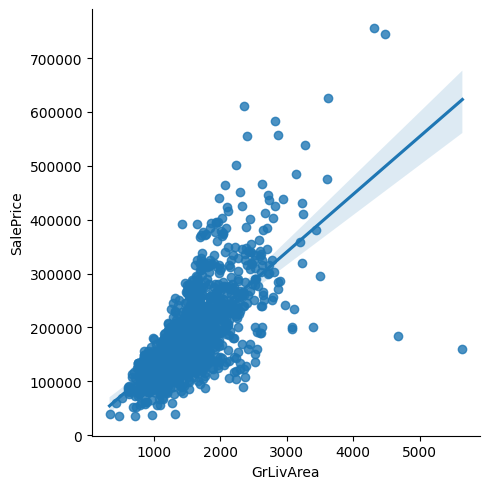

In [24]:
#scatter plot grlivarea/saleprice
# sns.relplot(x='GrLivArea', y='SalePrice', kind='scatter', data=data)
sns.lmplot(x='GrLivArea', y='SalePrice', data=data)

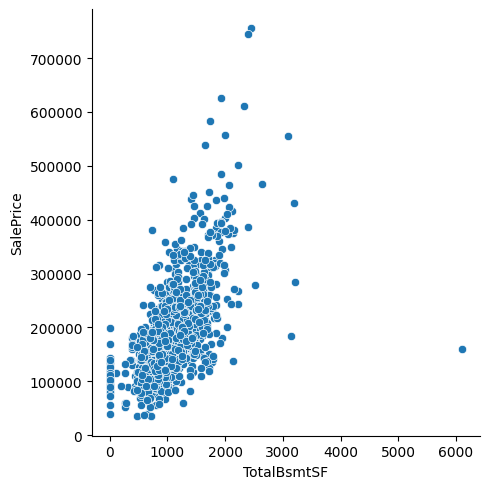

In [25]:
#scatter plot totalbsmtsf/saleprice
sns.relplot(x='TotalBsmtSF', y='SalePrice', data=data)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

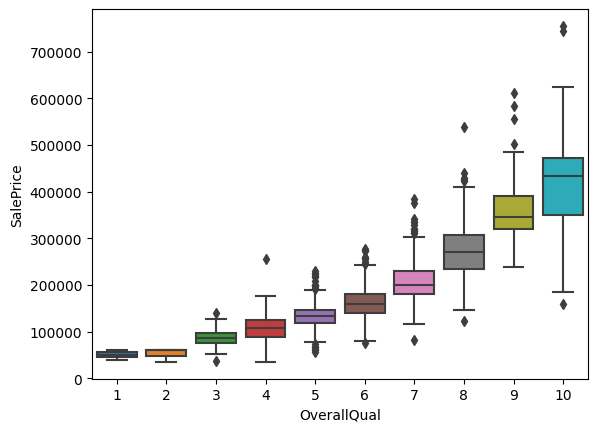

In [26]:
#box plot overallqual/saleprice
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

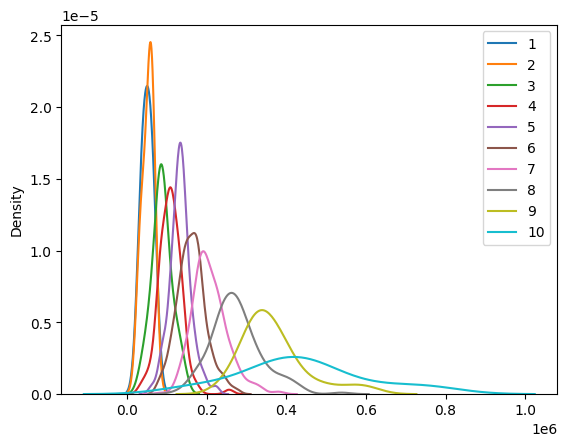

In [27]:
fig, ax = plt.subplots()
sns.distplot(x=data[data['OverallQual']==1]['SalePrice'], hist=False, label='1')
sns.distplot(x=data[data['OverallQual']==2]['SalePrice'], hist=False, label='2')
sns.distplot(x=data[data['OverallQual']==3]['SalePrice'], hist=False, label='3')
sns.distplot(x=data[data['OverallQual']==4]['SalePrice'], hist=False, label='4')
sns.distplot(x=data[data['OverallQual']==5]['SalePrice'], hist=False, label='5')
sns.distplot(x=data[data['OverallQual']==6]['SalePrice'], hist=False, label='6')
sns.distplot(x=data[data['OverallQual']==7]['SalePrice'], hist=False, label='7')
sns.distplot(x=data[data['OverallQual']==8]['SalePrice'], hist=False, label='8')
sns.distplot(x=data[data['OverallQual']==9]['SalePrice'], hist=False, label='9')
sns.distplot(x=data[data['OverallQual']==10]['SalePrice'], hist=False, label='10')
plt.legend()

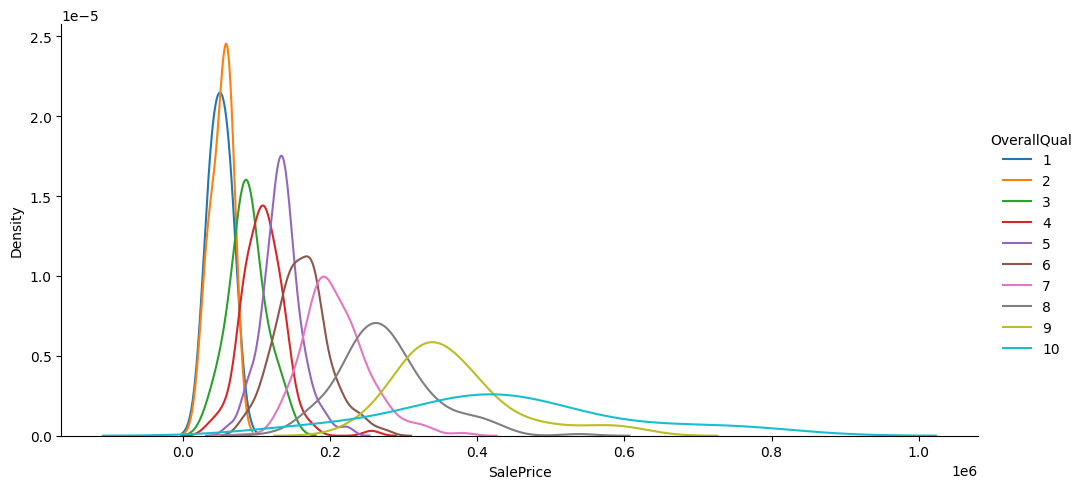

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid
g = sns.FacetGrid(data, hue="OverallQual", aspect=2, height=5)

# Map the kdeplot onto the grid
g.map(sns.kdeplot, "SalePrice", common_norm=False)

# Add a legend
g.add_legend(title='OverallQual')

# Show the plot
plt.show()


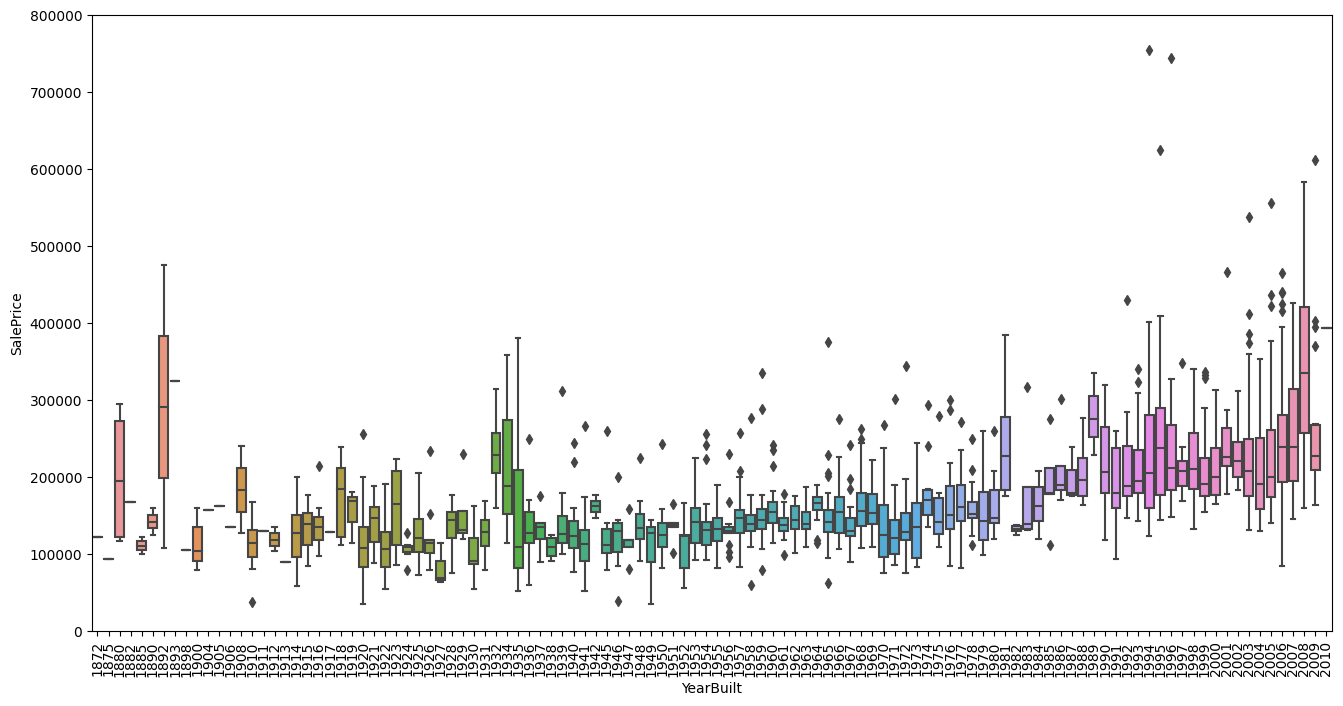

In [29]:
#box plot yearbuilt/saleprice
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

CONCLUSIONS:
* +ve Linear Relationship with GrLivArea
* +ve Linear Relationship with TotalBsmtSF (higher slope)
* Prices increased with a increase in OverallQual

<Axes: >

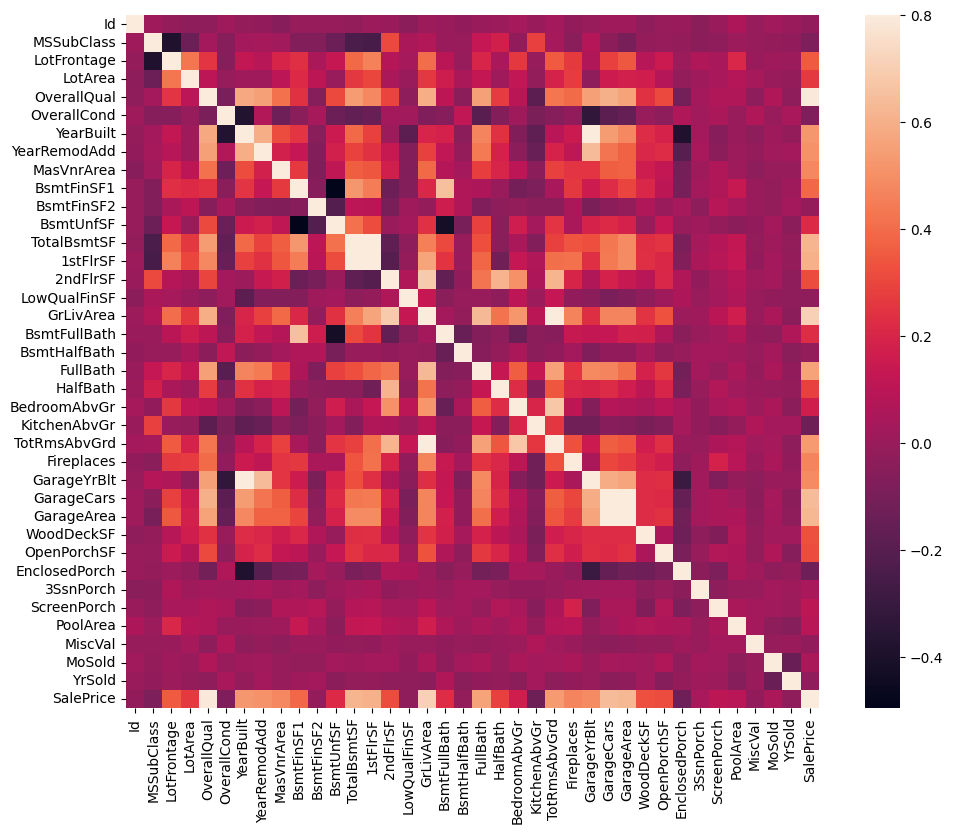

In [30]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True), vmax=.8, square=True)

In [31]:
data.corr(numeric_only=True)[['SalePrice']]

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


CONCLUSIONS:

'TotalBsmtSF' and '1stFlrSF' & 'GarageX' variables are highly correlated.

Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

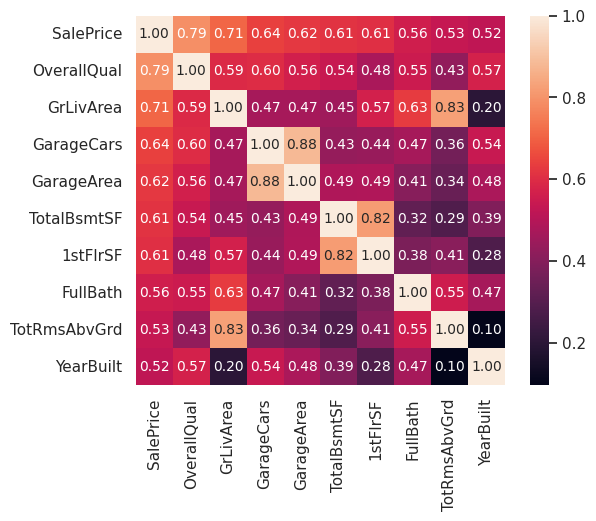

In [32]:
#saleprice correlation matrix
corrmat = data.corr(numeric_only=True)

#number of variables for heatmap
k=10 

#This first sorts the table as per values of 'SalePrice' & 
#returns first 10 rows & then we store the names of those cols
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Function: Computes the Pearson correlation coefficient matrix.
# computes the correlation matrix of the rows (default behavior). 
# To compute the correlation matrix of the columns, you would need to transpose the array

cm = np.corrcoef(data[cols].values.T)
# cm = data[cols].corr() -> iske jaisa hi same kaam karega bas arrays output honge

sns.set(font_scale=1)

hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
                annot_kws={'size':10}, yticklabels=cols.values, 
                xticklabels=cols.values)
# as array pass kara h toh xtick, ytick alag se batane padenge

plt.show()

CONCLUSIONS:
* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. But, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
* 'YearBuilt' is slightly correlated with 'SalePrice'. We should do a little bit of time-series analysis to get this right.

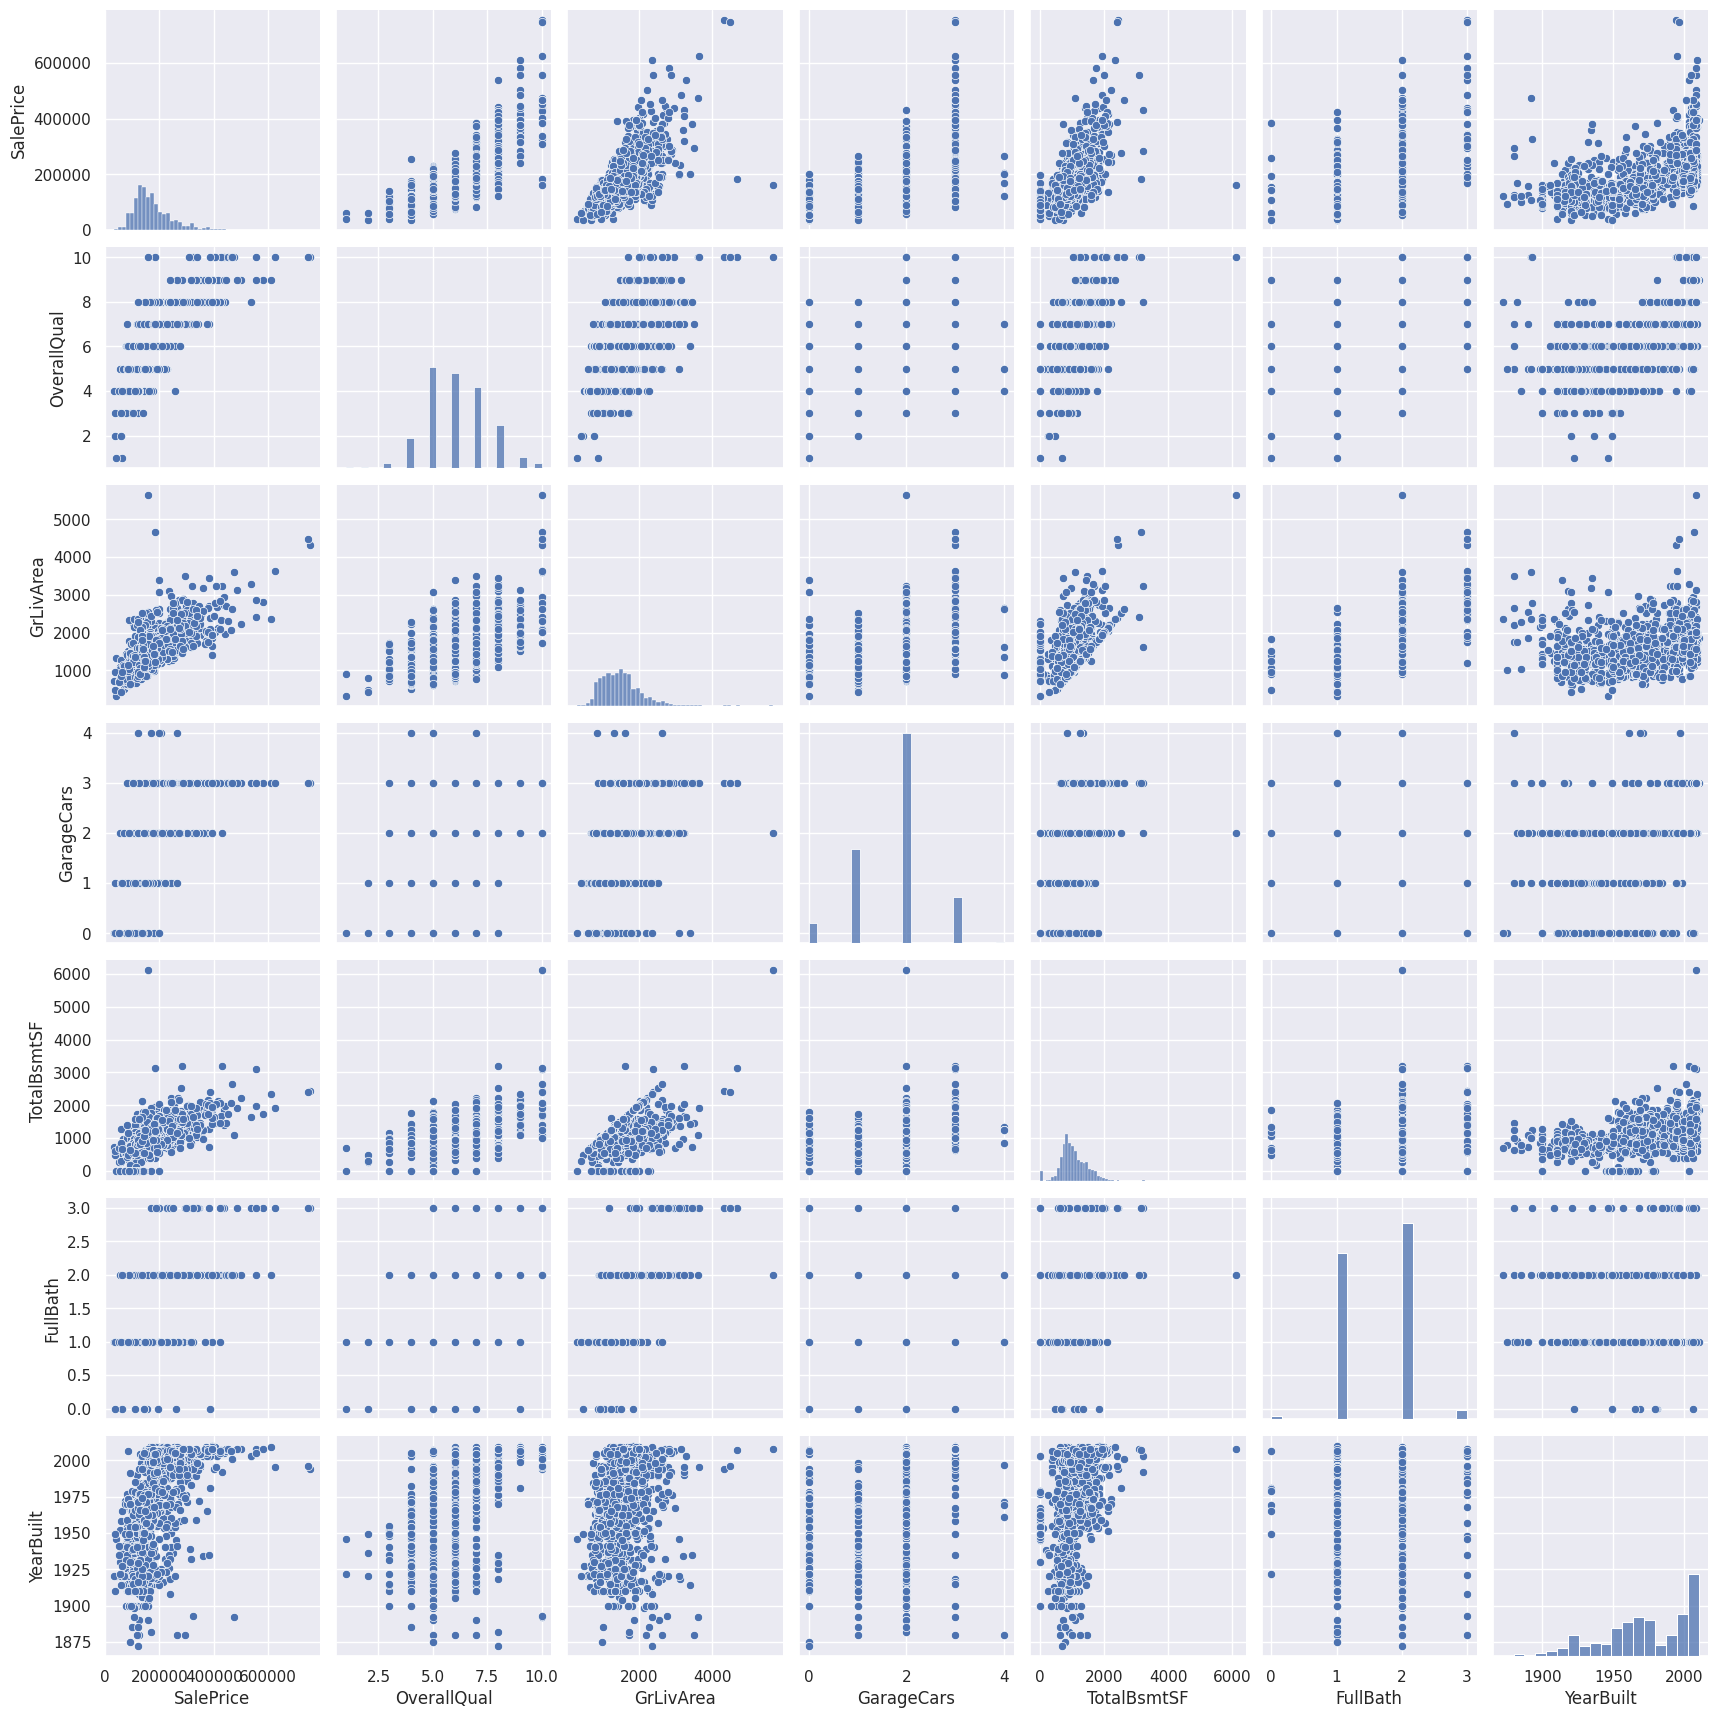

755000

In [33]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();
data['SalePrice'].max()

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

> ***Missing Data***

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [34]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable. This means that we will not try any trick to fill the missing data in these cases.

Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In [35]:
# columns to be removed
missing_data[missing_data['Percent']>0.15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

We can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations. Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [36]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max()

0

> ***Outliers***

In [37]:
# Univariate analysis
# standardize the data - converting data values to have mean of
# 0 and a standard deviation of 1

#standardizing data
saleprice_scaled = StandardScaler().fit_transform(
    data['SalePrice'].values.reshape(-1, 1));
low_range = saleprice_scaled[
    saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[
    saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<Axes: >

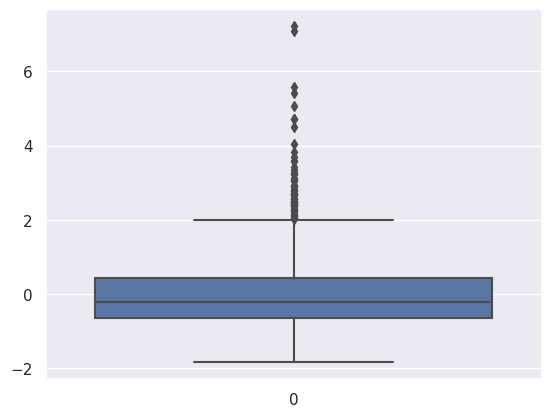

In [38]:
sns.boxplot(saleprice_scaled)

In [39]:
#For now not removing any outliers, but we should be careful with 7. values

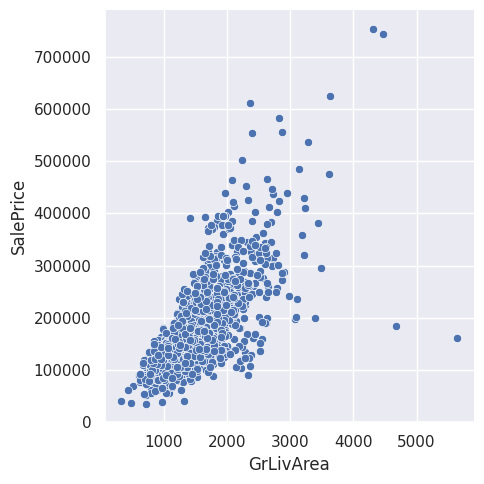

In [40]:
# Bivariate analysis
#bivariate analysis saleprice/grlivarea
sns.relplot(x='GrLivArea', y='SalePrice', data=data, kind='scatter')

CONCLUSIONS:
* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. Maybe they refer to agricultural area and that could explain the low price. These two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [41]:
#deleting points
data.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [42]:
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

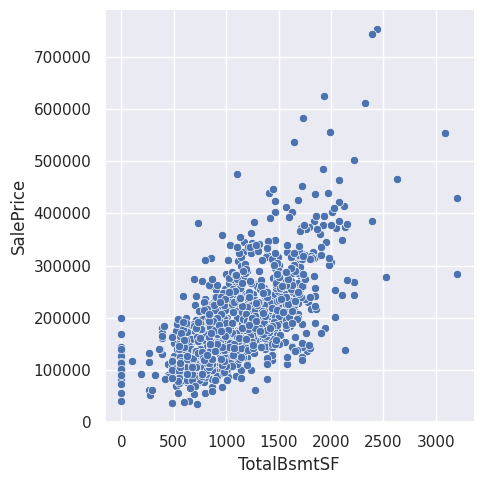

In [43]:
#bivariate analysis saleprice/totalbsmtsf
sns.relplot(x='TotalBsmtSF', y='SalePrice', data=data, kind='scatter')

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

Time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

* **Normality** - the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* **Homoscedasticity** - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

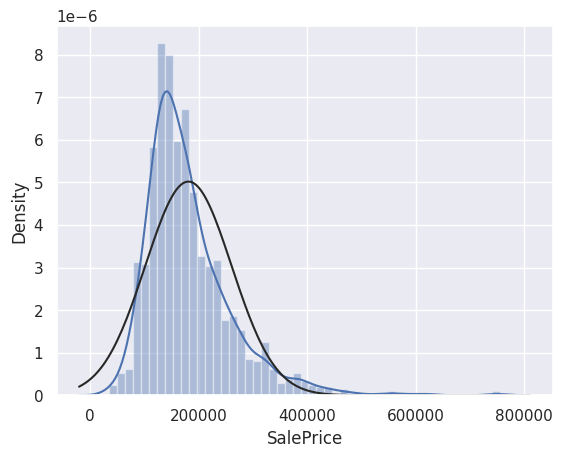

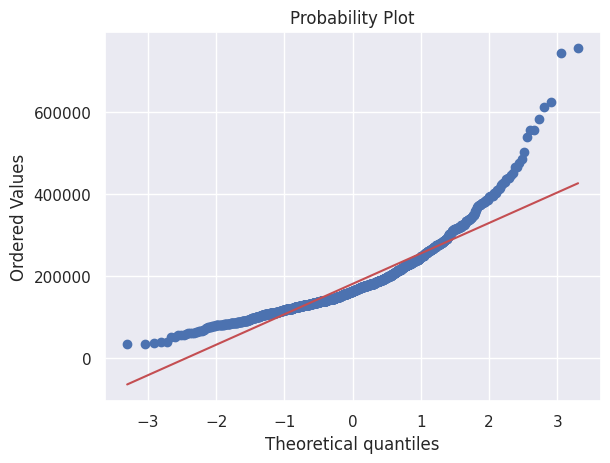

In [44]:
# SalePrice

# Normality

# We'll do this paying attention to:

# Histogram - Kurtosis and skewness.
# Normal probability plot - Data distribution should closely 
# follow the diagonal that represents the normal distribution.

sns.distplot(data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [45]:
res

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74240.99917988208, 180942.13864104328, 0.9320520365889887))

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well.

In [46]:
data['SalePrice'] = np.log(data['SalePrice'])

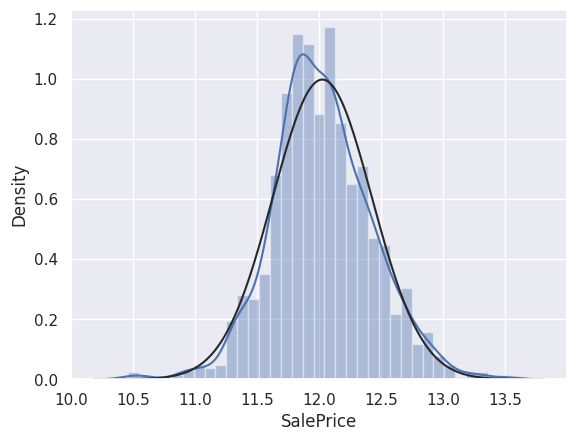

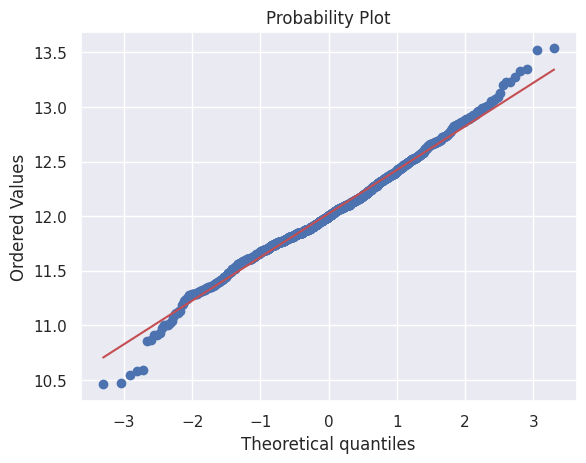

In [47]:
sns.distplot(data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

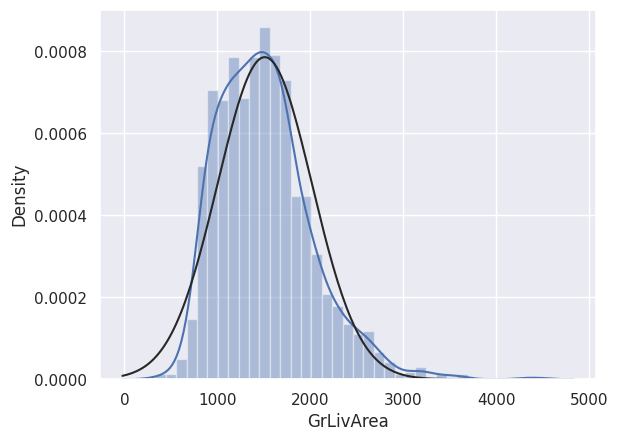

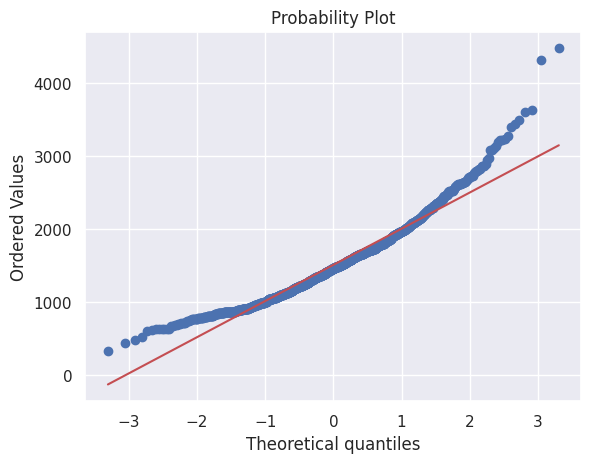

In [48]:
# GrLivArea
sns.distplot(data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [49]:
# positive skewness

In [50]:
data['GrLivArea'] = np.log(data['GrLivArea'])

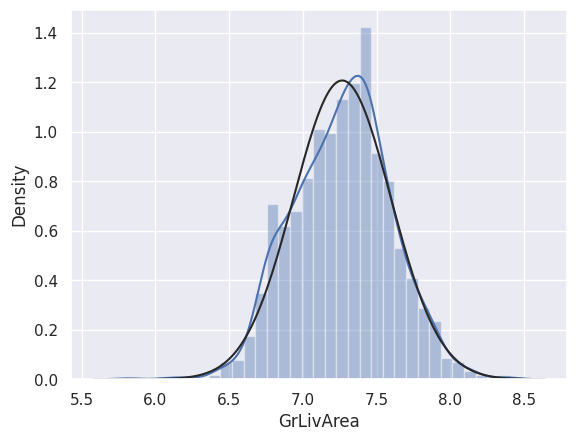

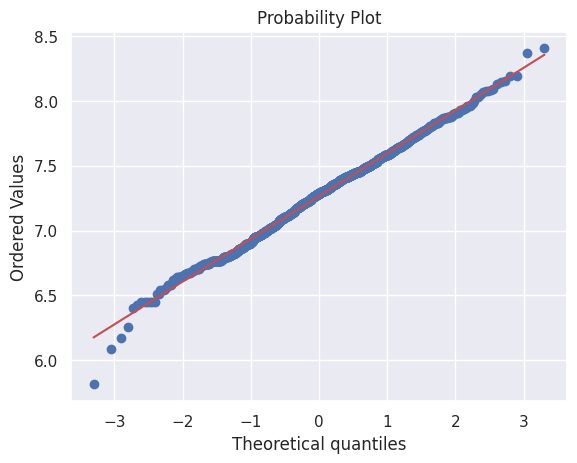

In [51]:
sns.distplot(data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

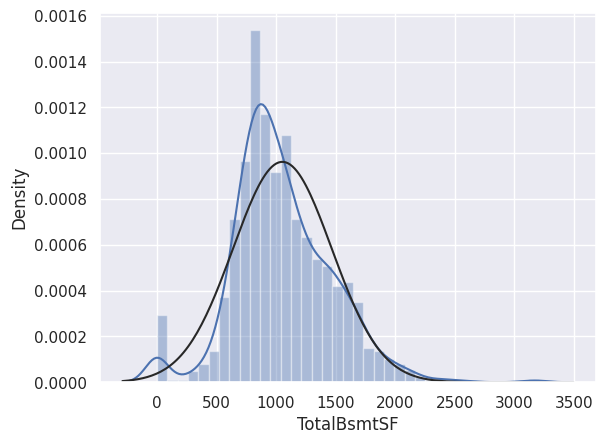

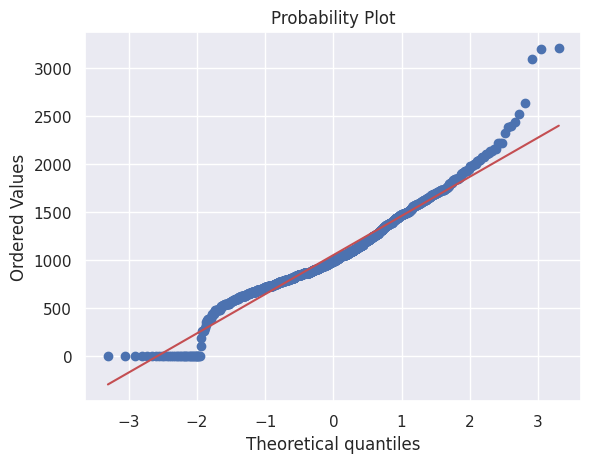

In [52]:
# TotalBsmtSF

sns.distplot(data['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['TotalBsmtSF'], plot=plt)

What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [53]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
data['HasBsmt'] = pd.Series(0, index=data.index)
data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [54]:
data['HasBsmt'].sample(40)

1077    1
888     1
1365    1
448     1
76      1
1195    1
1332    1
1139    1
315     1
1105    1
1119    1
1022    1
929     1
93      1
1122    1
1455    1
1339    1
680     1
828     1
1001    1
878     1
1422    1
70      1
688     1
508     1
1131    1
236     1
517     1
642     1
149     1
1340    1
556     1
771     1
1321    0
1425    1
357     1
1349    1
871     1
1378    1
756     1
Name: HasBsmt, dtype: int64

In [55]:
#transform data
data.loc[data['HasBsmt']==1, 'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

#hence using the mask above has helped us to update values only 
#where TotalBsmtSF !=0, and the assignment has already taken care
#to match the indexes

In [56]:
data['TotalBsmtSF'][630]

6.455198563340122

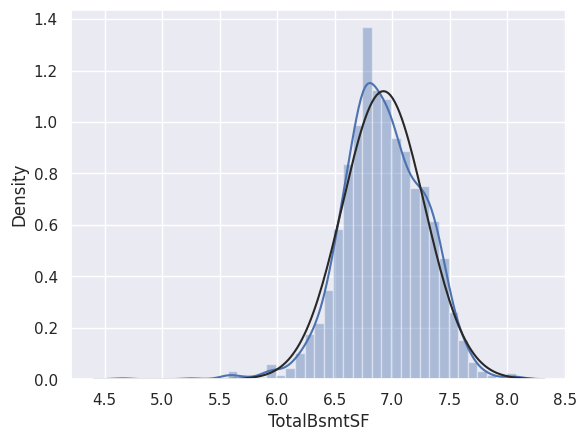

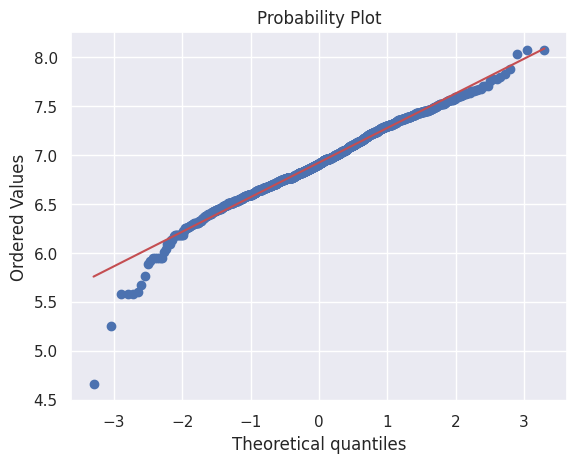

In [57]:
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [58]:
# Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

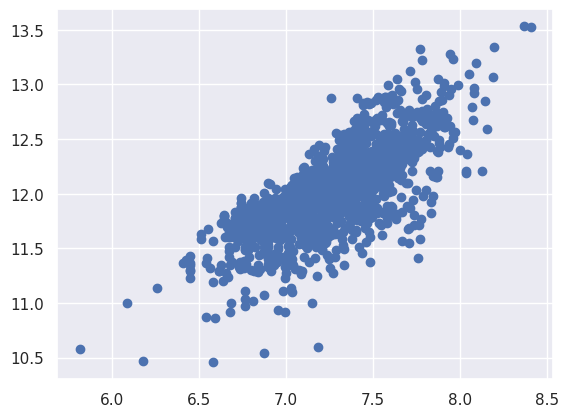

In [59]:
#scatter plot 'SalePrice' and 'GrLivArea'
plt.scatter(data['GrLivArea'], data['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape.
As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

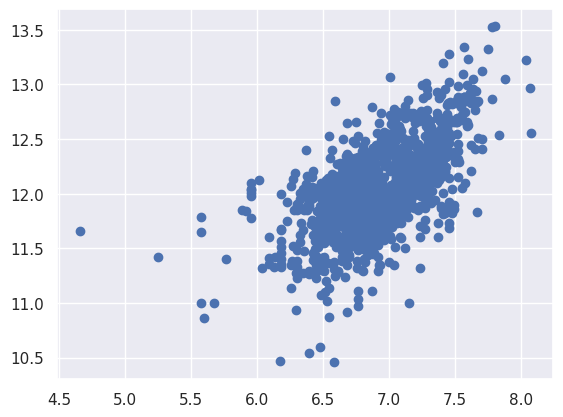

In [60]:
plt.scatter(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], data[data['TotalBsmtSF']>0]['SalePrice'])

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'.

In [61]:
#dummy variables
#convert categorical variable into dummy

data = pd.get_dummies(data)

> ***Conclusion***



Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](http://amzn.to/2uC3j9p).

We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables.

**New things learnt**
* sns.lmplot -> to plot scatter plot and reg line
* sns.FacetGrid
* If dealing with prices over years, prices should be constant prices
* Multicolinearity -> several independent variables in a model are correlated
* Conditions for multivariate analysis -> Normality, Homoscedasticity, Linearity, Absence of correlated errors
* If positive skewness -> transformation used is log transformation